# Lab 5: Clustering Techniques Using DBSCAN and Hierarchical Clustering  
**Name:** Sudhanshu Sekhar Dash  
**Course:** MSCS 634 – Advanced Big Data & Data Mining  
**Assignment:** Lab 5 – Clustering Techniques Using DBSCAN and Hierarchical Clustering


## 1. Overview

In this lab, we explore clustering techniques using **Hierarchical (Agglomerative)** and **DBSCAN** algorithms on the Wine dataset from the `sklearn` Python library.  



In [1]:
# 2. Setup and Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

from scipy.cluster.hierarchy import dendrogram, linkage

# Configure basic plotting
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 120


## 3. Data Preparation and Exploration (Step 1)

In this section we:
1. Load the Wine dataset from `sklearn.datasets`.
2. Convert it into a Pandas DataFrame.
3. Inspect the structure with `.head()`, `.info()`, and `.describe()`.
4. Standardize the feature columns using `StandardScaler` so that all features are on a comparable scale.


In [2]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# Create a DataFrame for easier exploration
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Basic exploration
print("Shape of the dataset:", df.shape)
display(df.head())
display(df.info())
display(df.describe())

# Check class distribution
print("\nTarget class distribution:")
print(df['target'].value_counts().sort_index())


Shape of the dataset: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

None

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000



Target class distribution:
target
0    59
1    71
2    48
Name: count, dtype: int64


In [3]:
# Standardize feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_names])

print("Standardized feature matrix shape:", X_scaled.shape)


Standardized feature matrix shape: (178, 13)


### 3.1 Dimensionality Reduction for Visualization

To visualize the clusters in 2D, we apply **PCA** (Principal Component Analysis) to project the standardized features onto the first two principal components.


In [4]:
# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio by first 2 PCs:", pca.explained_variance_ratio_)


Explained variance ratio by first 2 PCs: [0.36198848 0.1920749 ]


## 4. Hierarchical Clustering (Step 2)



n_clusters = 2 -> Silhouette Score: 0.267


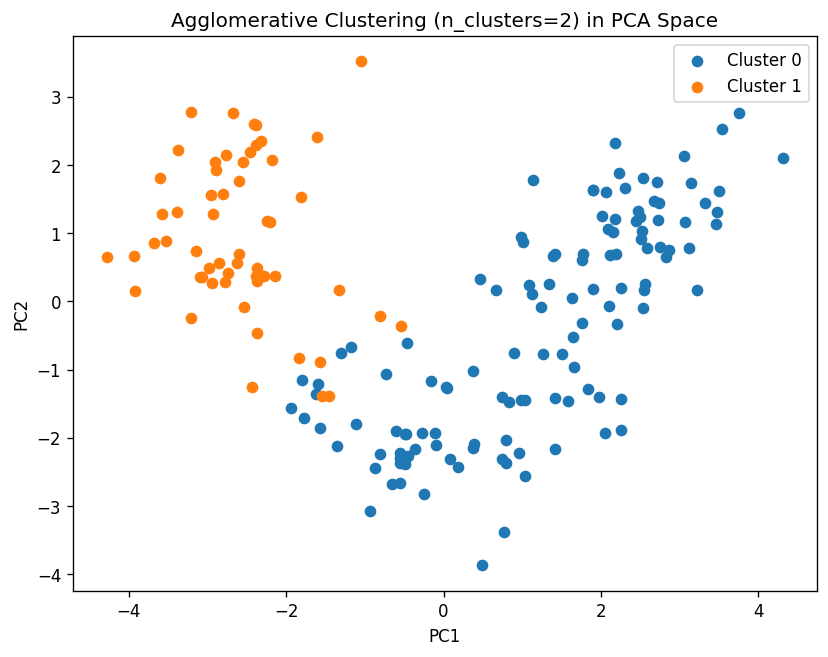

n_clusters = 3 -> Silhouette Score: 0.277


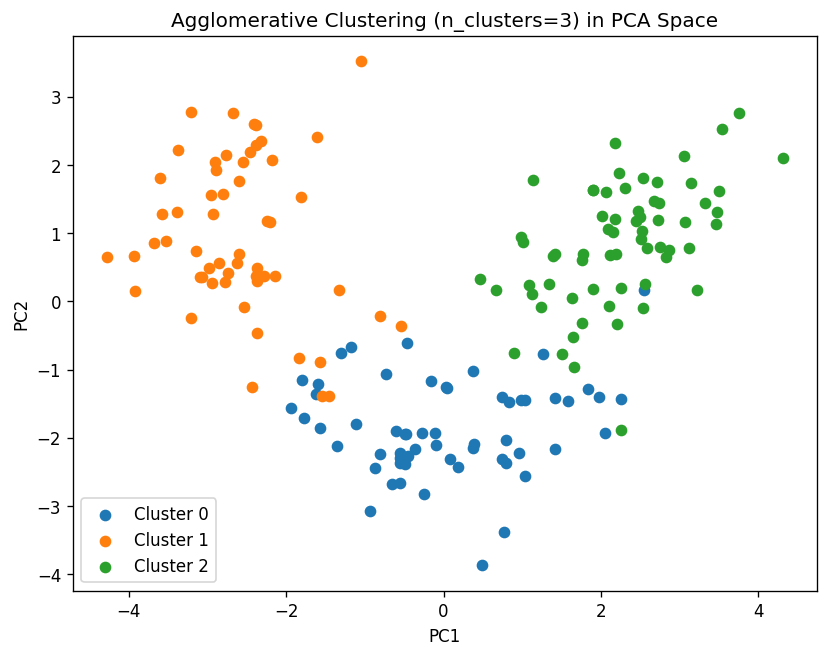

n_clusters = 4 -> Silhouette Score: 0.226


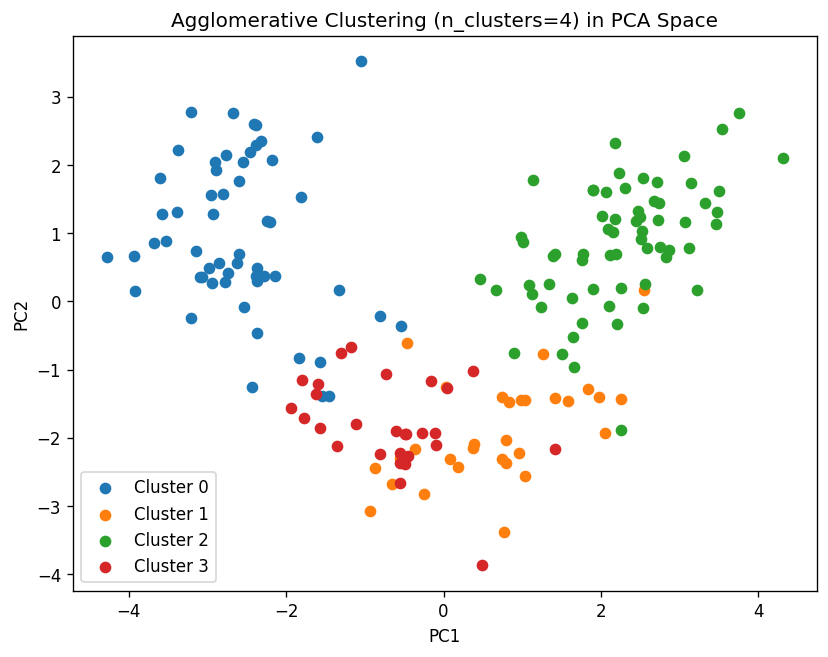

n_clusters = 5 -> Silhouette Score: 0.187


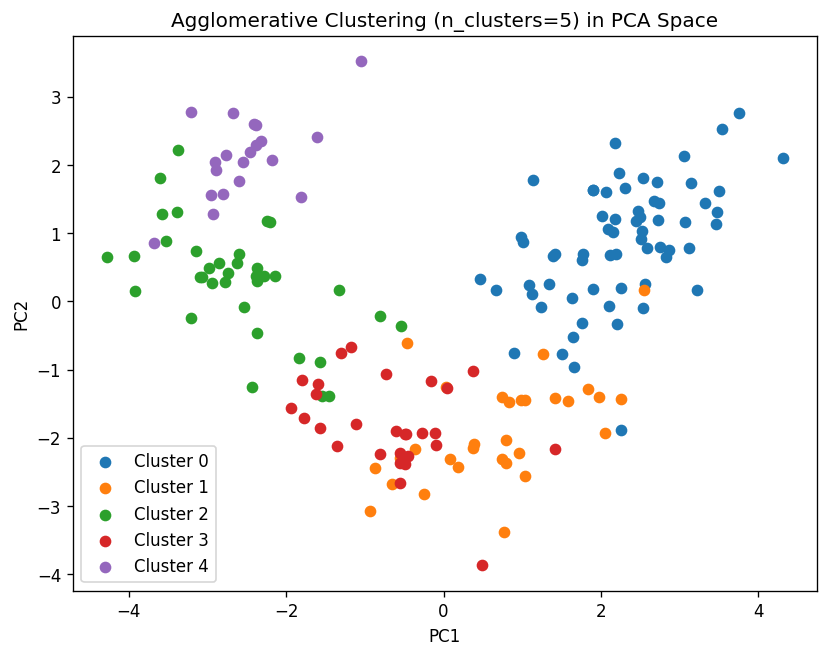

In [5]:
# Try different numbers of clusters for Agglomerative Clustering
cluster_list = [2, 3, 4, 5]

for n_clusters in cluster_list:
    agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels_agg = agg.fit_predict(X_scaled)
    
    # Compute Silhouette Score for comparison (optional but helpful)
    sil = silhouette_score(X_scaled, labels_agg)
    print(f"n_clusters = {n_clusters} -> Silhouette Score: {sil:.3f}")
    
    # Scatter plot of clusters in PCA space
    plt.figure()
    for label in np.unique(labels_agg):
        plt.scatter(
            X_pca[labels_agg == label, 0],
            X_pca[labels_agg == label, 1],
            label=f"Cluster {label}"
        )
    plt.title(f"Agglomerative Clustering (n_clusters={n_clusters}) in PCA Space")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.show()


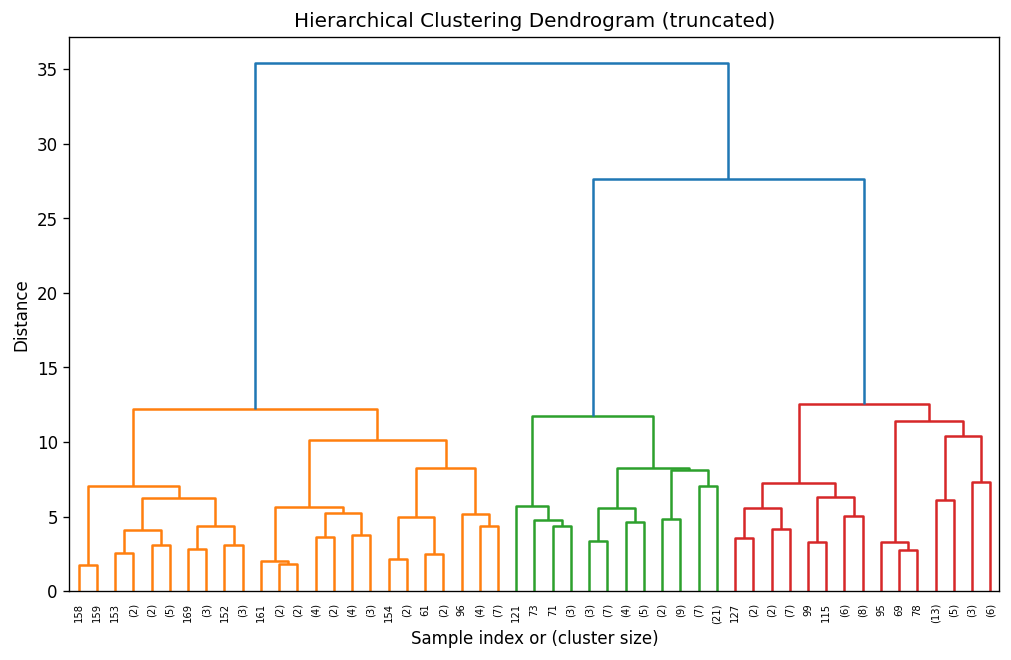

In [6]:
# Generate linkage matrix and dendrogram
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.show()


**Interpretation Note:**  
- The dendrogram shows how data points are merged step-by-step into larger clusters.  
- Large vertical distances between merges indicate well-separated clusters.  
- Cutting the dendrogram at different heights corresponds to different values of `n_clusters`.


## 5. DBSCAN Clustering (Step 3)

We now apply **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**.


In [7]:
# Helper function to run DBSCAN with given parameters and print metrics
def run_dbscan(eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_scaled)
    
    # Number of clusters (excluding noise label -1)
    unique_labels = set(labels)
    n_clusters = len(unique_labels - {-1})
    n_noise = np.sum(labels == -1)
    
    print(f"DBSCAN with eps={eps}, min_samples={min_samples}")
    print(f"  -> Number of clusters (excluding noise): {n_clusters}")
    print(f"  -> Number of noise points: {n_noise}")
    
    # Only compute metrics if we have at least 2 clusters
    if n_clusters > 1:
        sil = silhouette_score(X_scaled, labels)
        hom = homogeneity_score(y, labels)
        comp = completeness_score(y, labels)
        
        print(f"  -> Silhouette Score: {sil:.3f}")
        print(f"  -> Homogeneity Score: {hom:.3f}")
        print(f"  -> Completeness Score: {comp:.3f}")
    else:
        print("  -> Metrics not computed (need at least 2 clusters).")
    
    print("-" * 60)
    return labels

# Experiment with a few parameter combinations
eps_values = [1.4, 1.6, 1.8, 2.0, 3.0]
min_samples_values = [3, 5]

results = {}

for eps in eps_values:
    for ms in min_samples_values:
        key = f"eps={eps}_min_samples={ms}"
        labels = run_dbscan(eps, ms)
        results[key] = labels


DBSCAN with eps=1.4, min_samples=3
  -> Number of clusters (excluding noise): 4
  -> Number of noise points: 165
  -> Silhouette Score: -0.299
  -> Homogeneity Score: 0.075
  -> Completeness Score: 0.225
------------------------------------------------------------
DBSCAN with eps=1.4, min_samples=5
  -> Number of clusters (excluding noise): 0
  -> Number of noise points: 178
  -> Metrics not computed (need at least 2 clusters).
------------------------------------------------------------
DBSCAN with eps=1.6, min_samples=3
  -> Number of clusters (excluding noise): 10
  -> Number of noise points: 124
  -> Silhouette Score: -0.218
  -> Homogeneity Score: 0.323
  -> Completeness Score: 0.280
------------------------------------------------------------
DBSCAN with eps=1.6, min_samples=5
  -> Number of clusters (excluding noise): 3
  -> Number of noise points: 162
  -> Silhouette Score: -0.179
  -> Homogeneity Score: 0.100
  -> Completeness Score: 0.271
-------------------------------------

Chosen DBSCAN configuration: eps=2.0, min_samples=3
Number of clusters (excluding noise): 5
Number of noise points: 64
Silhouette Score: 0.031
Homogeneity Score: 0.442
Completeness Score: 0.372


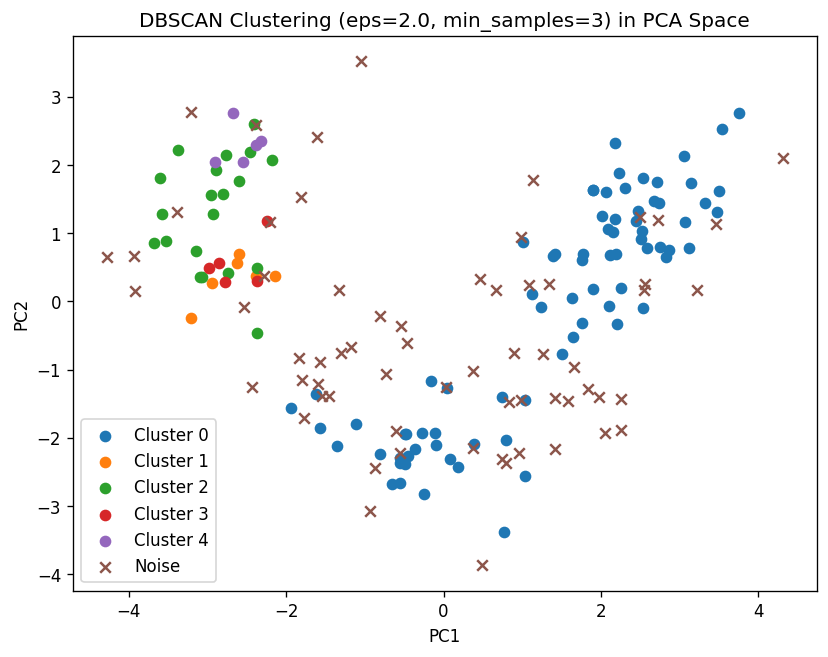

In [8]:
# Choose one configuration (update to the one you like based on the results above)
chosen_eps = 2.0
chosen_min_samples = 3

db_best = DBSCAN(eps=chosen_eps, min_samples=chosen_min_samples)
labels_db = db_best.fit_predict(X_scaled)

# Compute metrics for the chosen configuration
unique_labels = set(labels_db)
n_clusters_best = len(unique_labels - {-1})
n_noise_best = np.sum(labels_db == -1)

print(f"Chosen DBSCAN configuration: eps={chosen_eps}, min_samples={chosen_min_samples}")
print(f"Number of clusters (excluding noise): {n_clusters_best}")
print(f"Number of noise points: {n_noise_best}")

if n_clusters_best > 1:
    sil_best = silhouette_score(X_scaled, labels_db)
    hom_best = homogeneity_score(y, labels_db)
    comp_best = completeness_score(y, labels_db)

    print(f"Silhouette Score: {sil_best:.3f}")
    print(f"Homogeneity Score: {hom_best:.3f}")
    print(f"Completeness Score: {comp_best:.3f}")

# Plot clusters in PCA space, marking noise points separately
plt.figure()
for label in unique_labels:
    if label == -1:
        # Noise
        mask = labels_db == label
        plt.scatter(
            X_pca[mask, 0],
            X_pca[mask, 1],
            marker='x',
            s=40,
            label='Noise'
        )
    else:
        mask = labels_db == label
        plt.scatter(
            X_pca[mask, 0],
            X_pca[mask, 1],
            label=f"Cluster {label}"
        )

plt.title(f"DBSCAN Clustering (eps={chosen_eps}, min_samples={chosen_min_samples}) in PCA Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


## 6. Analysis and Insights (Step 4)

### 6.1 Comparison of Hierarchical vs DBSCAN

Based on the visualizations and metrics above

- **Number of clusters** produced by Agglomerative Clustering vs DBSCAN.
- **Cluster shapes and separation** in PCA space.
- **Presence of noise points** 
- **Silhouette / homogeneity / completeness** 


